# Data analysis of Stripe 82 data

In [1]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# import pip
# pip.main(["install", "seaborn"])

## Plot magnitude vs magnitude error 

In [3]:
data = pd.read_csv('../processed/unbalanced/final_v1.csv')

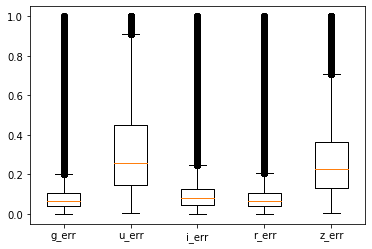

In [4]:
#preprocess the data
pre_data = data[(data['g']>0) & (data['u']>0) & (data['i']>0) & (data['r']>0) & (data['z']>0) & (data['g_error']>0)& (data['u_error']>0)& (data['i_error']>0)& (data['r_error']>0)& (data['z_error']>0)& (data['g_error']<1)& (data['u_error']<1)& (data['r_error']<1)& (data['i_error']<1)& (data['z_error']<1)]
# pre_data = data
labels = 'g_err', 'u_err', 'i_err', 'r_err', 'z_err'
plt.boxplot([pre_data['g_error'],pre_data['u_error'], pre_data['i_error'], pre_data['r_error'], pre_data['z_error']], labels=labels)
plt.show()

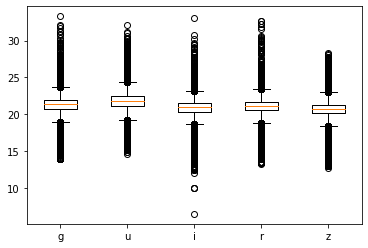

In [5]:
labels = 'g', 'u', 'i', 'r', 'z'
plt.boxplot([pre_data['g'],pre_data['u'], pre_data['i'], pre_data['r'], pre_data['z']], labels=labels)
plt.show()

g band:

array([[1.        , 0.67341215],
       [0.67341215, 1.        ]])

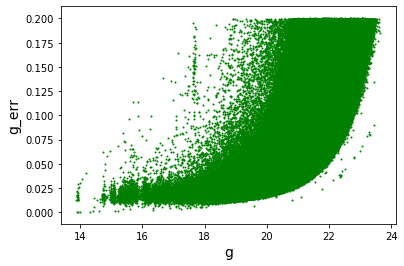

In [6]:
g_data = data[(data['g']>0) & (data['g_error']<0.2) & (data['g']<25)]
plt.scatter(g_data['g'],g_data['g_error'],s=1,color = 'g')
plt.xlabel('g', fontsize=14)
plt.ylabel('g_err', fontsize=14)
plt.savefig('gerr_with_g.png')
np.corrcoef(g_data['g'],g_data['g_error'])

u band:

array([[1.        , 0.67367597],
       [0.67367597, 1.        ]])

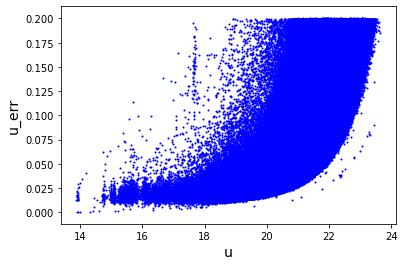

In [24]:
u_data = data[(data['u']>0) & (data['u_error']<0.2) & (data['u']<25)]
plt.scatter(u_data['u'],u_data['u_error'],s=1,color = 'b')
plt.xlabel('u', fontsize=14)
plt.ylabel('u_err', fontsize=14)
plt.savefig('uerr_with_u.png')
np.corrcoef(u_data['u'],u_data['u_error'])

i band:

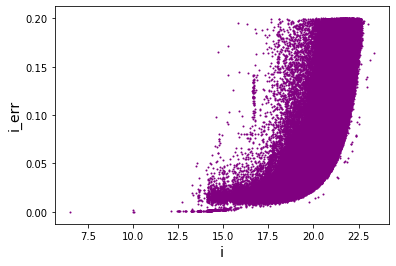

array([[1.        , 0.76232309],
       [0.76232309, 1.        ]])

In [25]:
i_data = data[(data['i']>0) & (data['i_error']<0.2) & (data['i']<25)]
plt.scatter(i_data['i'],i_data['i_error'], s=1, color = 'purple')
plt.xlabel('i', fontsize=14)
plt.ylabel('i_err', fontsize=14)
plt.show()
np.corrcoef(i_data['i'],i_data['i_error'])

r band:

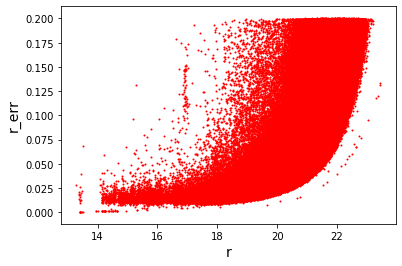

array([[1.        , 0.73128601],
       [0.73128601, 1.        ]])

In [26]:
r_data = data[(data['r']>0) & (data['r_error']<0.2)]
plt.scatter(r_data['r'],r_data['r_error'],s=1, color='red')
plt.xlabel('r', fontsize=14)
plt.ylabel('r_err', fontsize=14)
plt.show()
np.corrcoef(r_data['r'],r_data['r_error'])

z band:

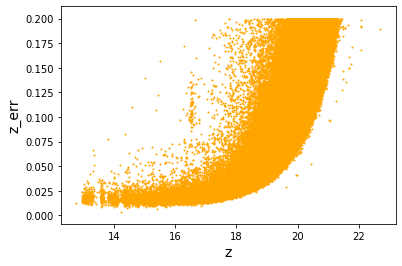

array([[1.        , 0.83283423],
       [0.83283423, 1.        ]])

In [27]:
z_data = data[(data['z']>0) & (data['z_error']<0.2)&(data['z']<25)]
plt.scatter(z_data['z'],z_data['z_error'],s=1, color='orange')
plt.xlabel('z', fontsize=14)
plt.ylabel('z_err', fontsize=14)
plt.show()
np.corrcoef(z_data['z'],z_data['z_error'])

## Plot g magnitude vs redshift

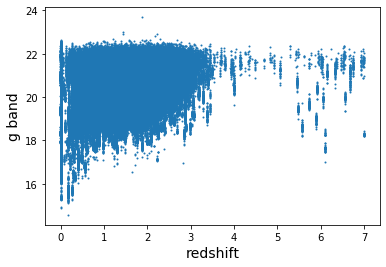

array([[1.        , 0.14593776],
       [0.14593776, 1.        ]])

In [28]:
plt.scatter(g_data['redshift'], g_data['g'],s=1)
# parameter = np.polyfit(g_data['redshift'], g_data['g'],1)
# f = np.poly1d(parameter)
# plt.plot(g_data['redshift'], f(g_data['redshift']),"g")
plt.xlabel('redshift', fontsize=14)
plt.ylabel('g band', fontsize=14)
plt.show()
np.corrcoef(g_data['g'], g_data['redshift'])

## (g magnitude - r magnitude) colour vs. redshift

array([[ 1.        , -0.03070072],
       [-0.03070072,  1.        ]])

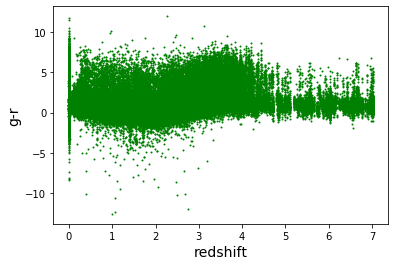

In [49]:
data1 = pre_data
x = data1['redshift']
y = data1['g']-data1['r']
plt.scatter(x, y, s=1,color='g')

plt.ylabel('g-r', fontsize=14)
plt.xlabel('redshift', fontsize=14)
plt.savefig('plots/g-r.png')
np.corrcoef(x, y)

array([[ 1.        , -0.04000522],
       [-0.04000522,  1.        ]])

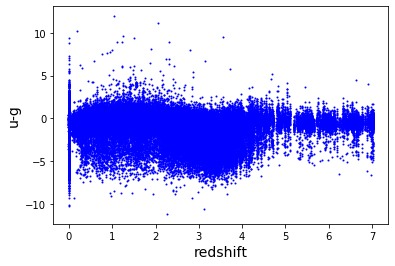

In [50]:
data1 = pre_data
x = data1['redshift']
y = data1['u']-data1['g']
plt.scatter(x, y, s=1,color='b')

plt.ylabel('u-g', fontsize=14)
plt.xlabel('redshift', fontsize=14)
plt.savefig('plots/u-g.png')
np.corrcoef(x, y)

array([[ 1.        , -0.09363707],
       [-0.09363707,  1.        ]])

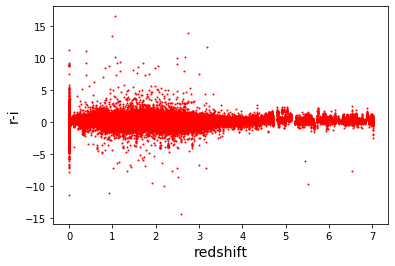

In [51]:
data1 = pre_data
x = data1['redshift']
y = data1['r']-data1['i']
plt.scatter(x, y, s=1,color='r')

plt.ylabel('r-i', fontsize=14)
plt.xlabel('redshift', fontsize=14)
plt.savefig('plots/r-i.png')
np.corrcoef(x, y)

array([[1.       , 0.0187537],
       [0.0187537, 1.       ]])

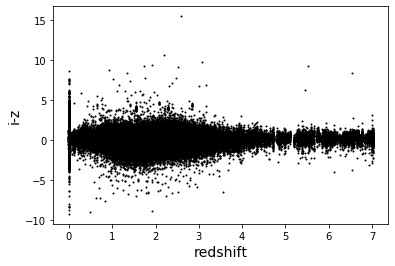

In [52]:
data1 = pre_data
x = data1['redshift']
y = data1['i']-data1['z']
plt.scatter(x, y, s=1,color='black')

plt.ylabel('i-z', fontsize=14)
plt.xlabel('redshift', fontsize=14)
plt.savefig('plots/i-z.png')
np.corrcoef(x, y)

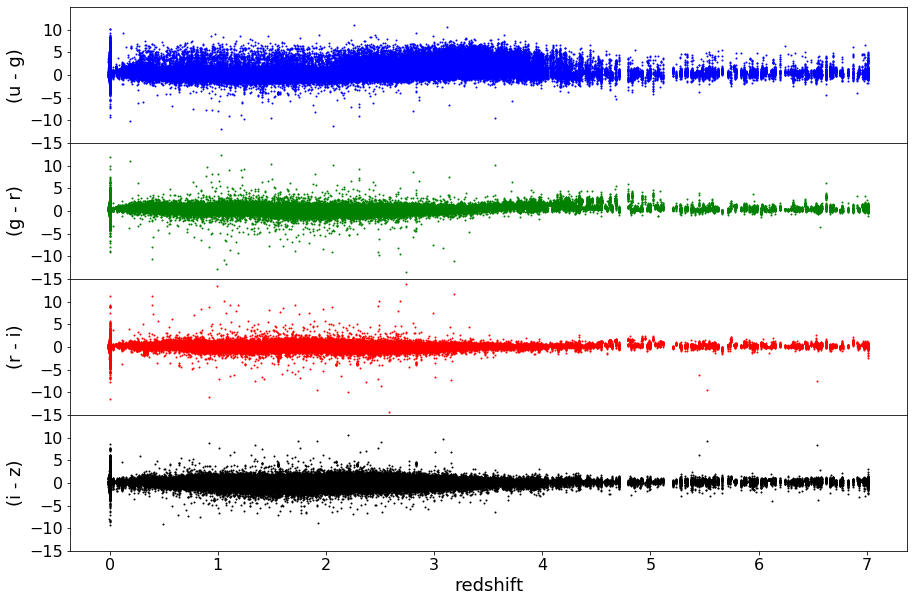

In [5]:

data1 = pre_data
fig, axs = plt.subplots(4, 1, sharex=True, figsize = (15,10))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
plt.rcParams['axes.facecolor'] = 'white'
axs[0].scatter(data1['redshift'], data1['u']-data1['g'], s=1,color='b')
axs[0].set_ylabel('(u - g)', fontsize=18)
axs[0].set_yticks(np.arange(-15, 15, 5))
axs[0].set_ylim(-15, 15)
axs[0].tick_params(axis="y", labelsize=16)


axs[1].scatter(data1['redshift'], data1['g']-data1['r'], s=1,color='g')
axs[1].set_ylabel('(g - r)', fontsize=18)
axs[1].set_yticks(np.arange(-15, 15, 5))
axs[1].set_ylim(-15, 15)
axs[1].tick_params(axis="y", labelsize=16)

axs[2].scatter(data1['redshift'], data1['r']-data1['i'],  s=1,color='r')
axs[2].set_ylabel('(r - i)', fontsize=18)
axs[2].set_yticks(np.arange(-15, 15, 5))
axs[2].set_ylim(-15, 15)
axs[2].tick_params(axis="y", labelsize=16)

axs[3].scatter(data1['redshift'], data1['i']-data1['z'],s=1,color='black')
axs[3].set_ylabel('(i - z)', fontsize=18)
axs[3].set_yticks(np.arange(-15, 15, 5))
axs[3].set_xlabel('redshift', fontsize=18)
axs[3].set_ylim(-15, 15)
axs[3].tick_params(axis="y", labelsize=16)
axs[3].tick_params(axis="x", labelsize=16)

plt.savefig('plots/filter_redshift.png')

## Correlation Matrix

<Figure size 2160x2160 with 0 Axes>

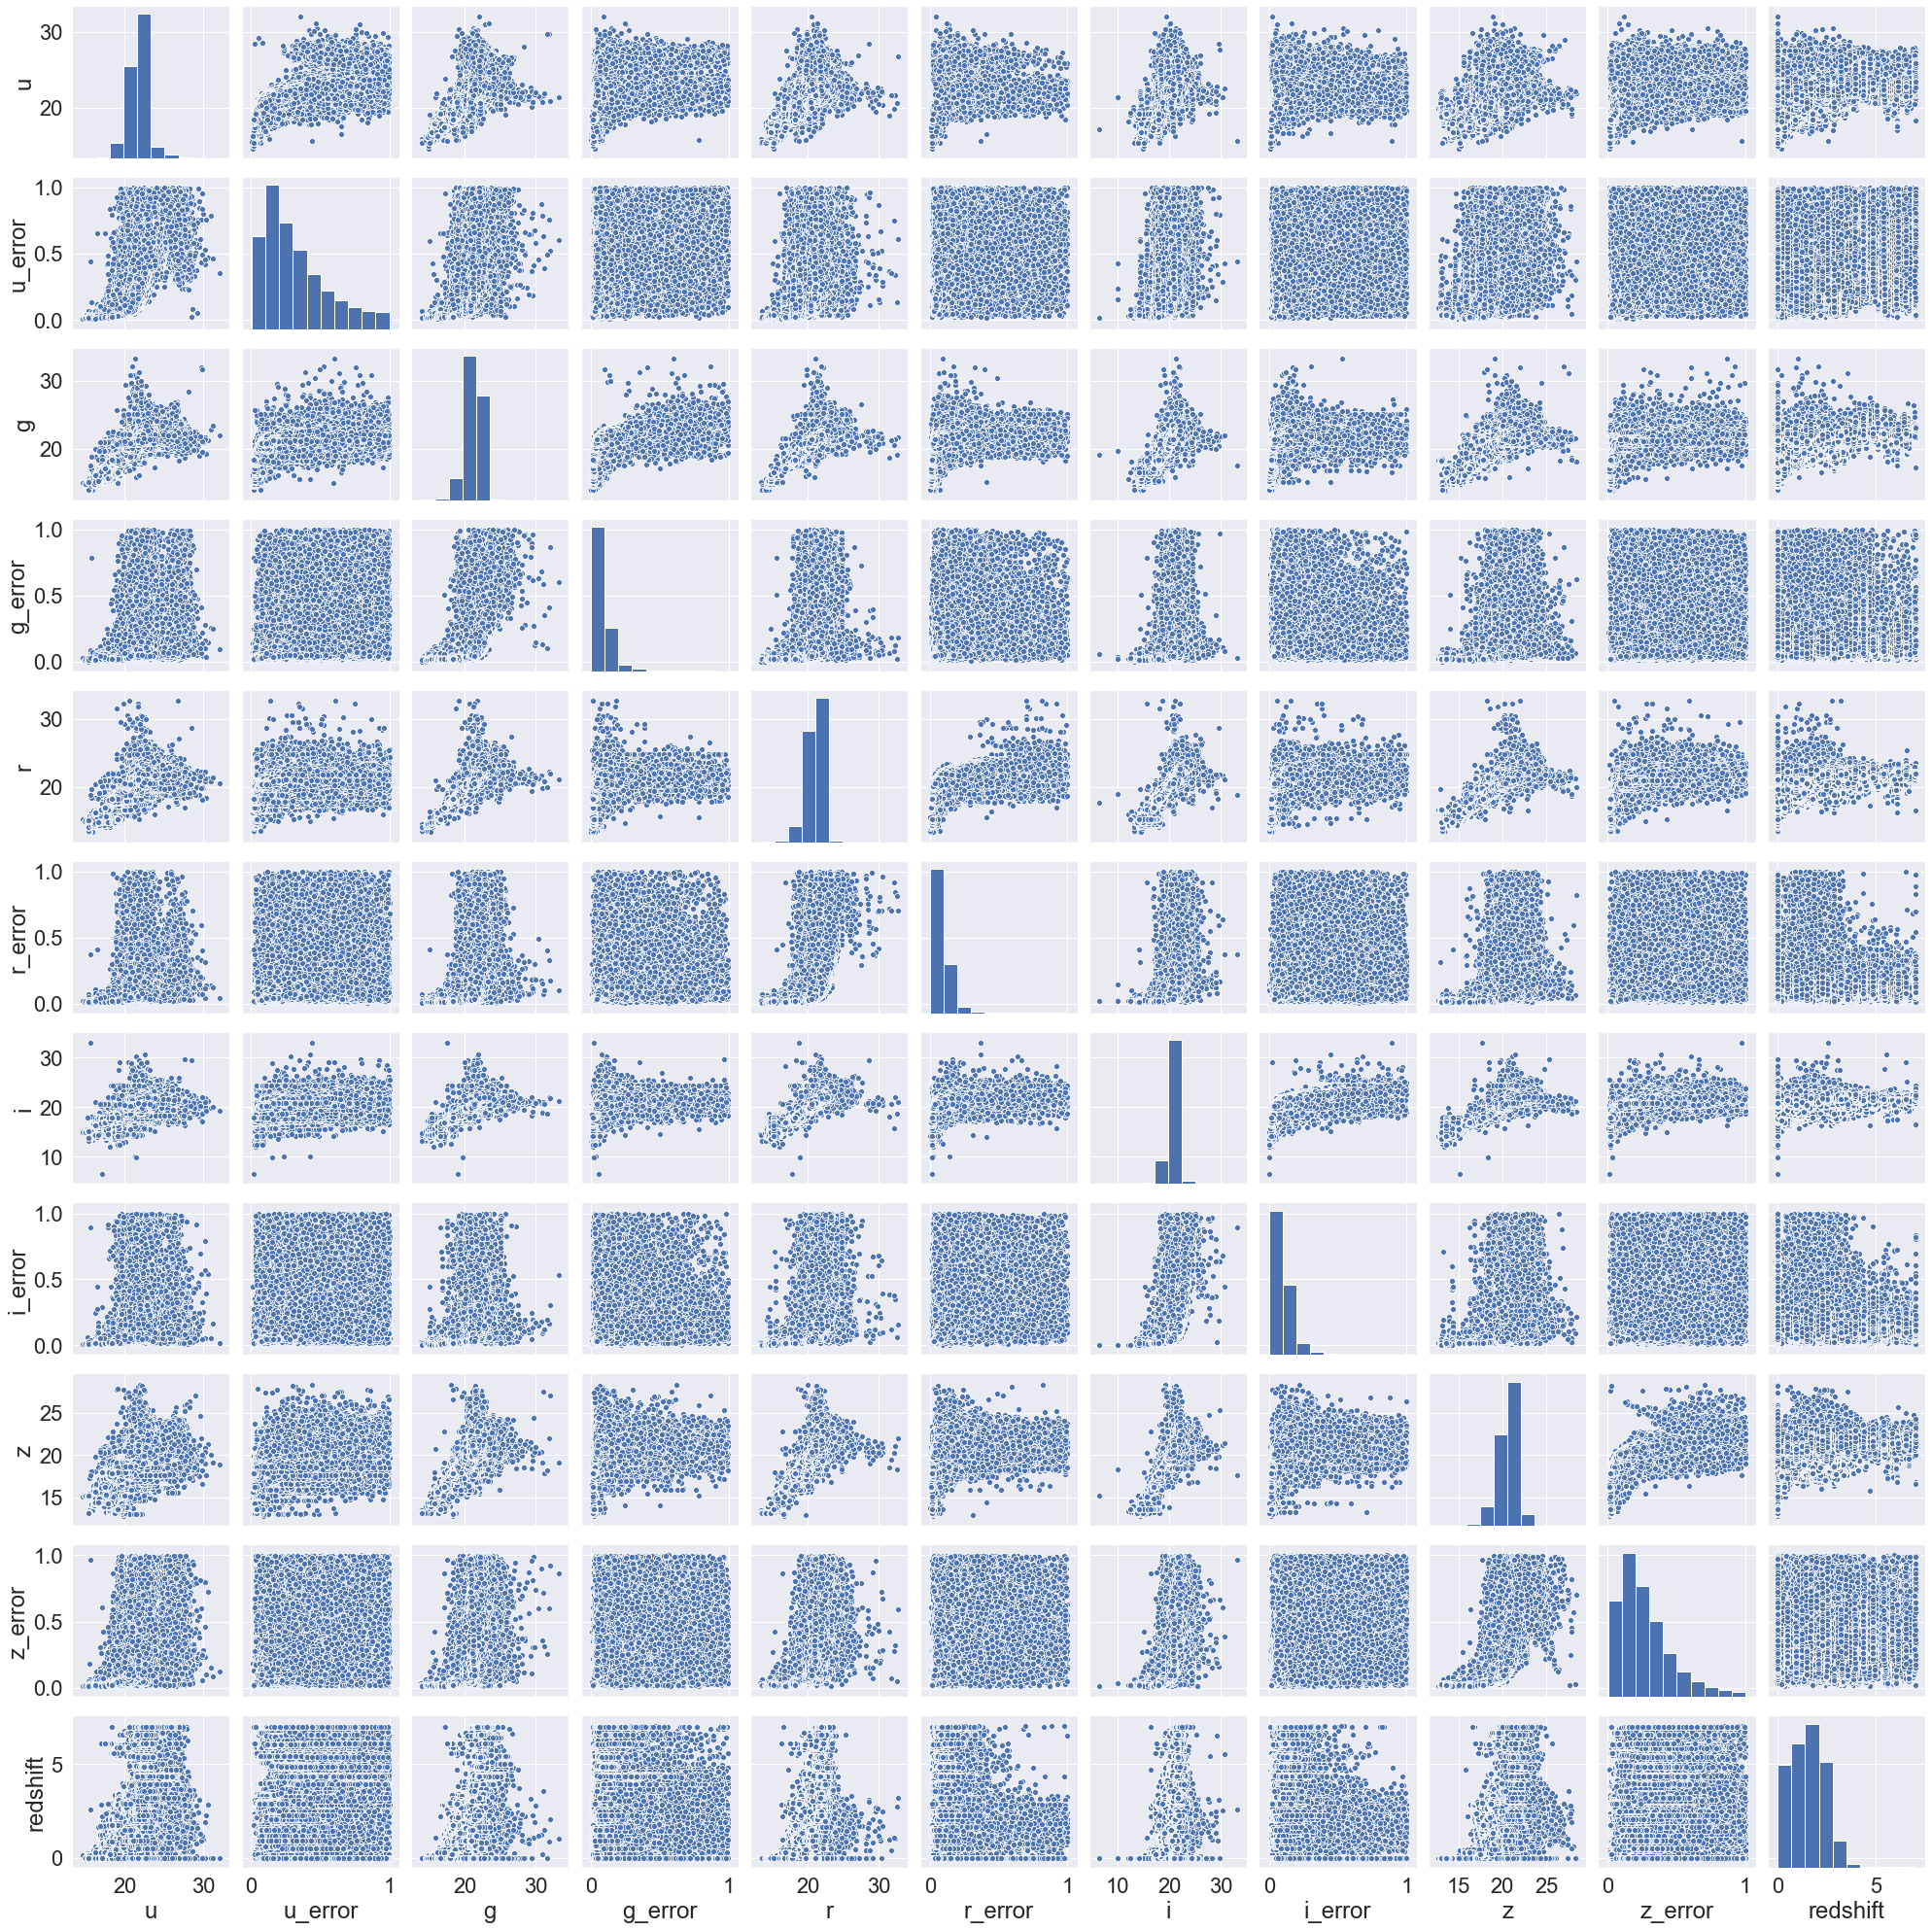

In [6]:
data1 = pre_data.drop(['id','ra','dec','mjd','type'], axis=1)
# data1 = data1[:5000]
plt.figure(figsize=(30, 30))
sns.set(font_scale=2)
sns.pairplot(data1)
plt.savefig('plots/correlation.png')

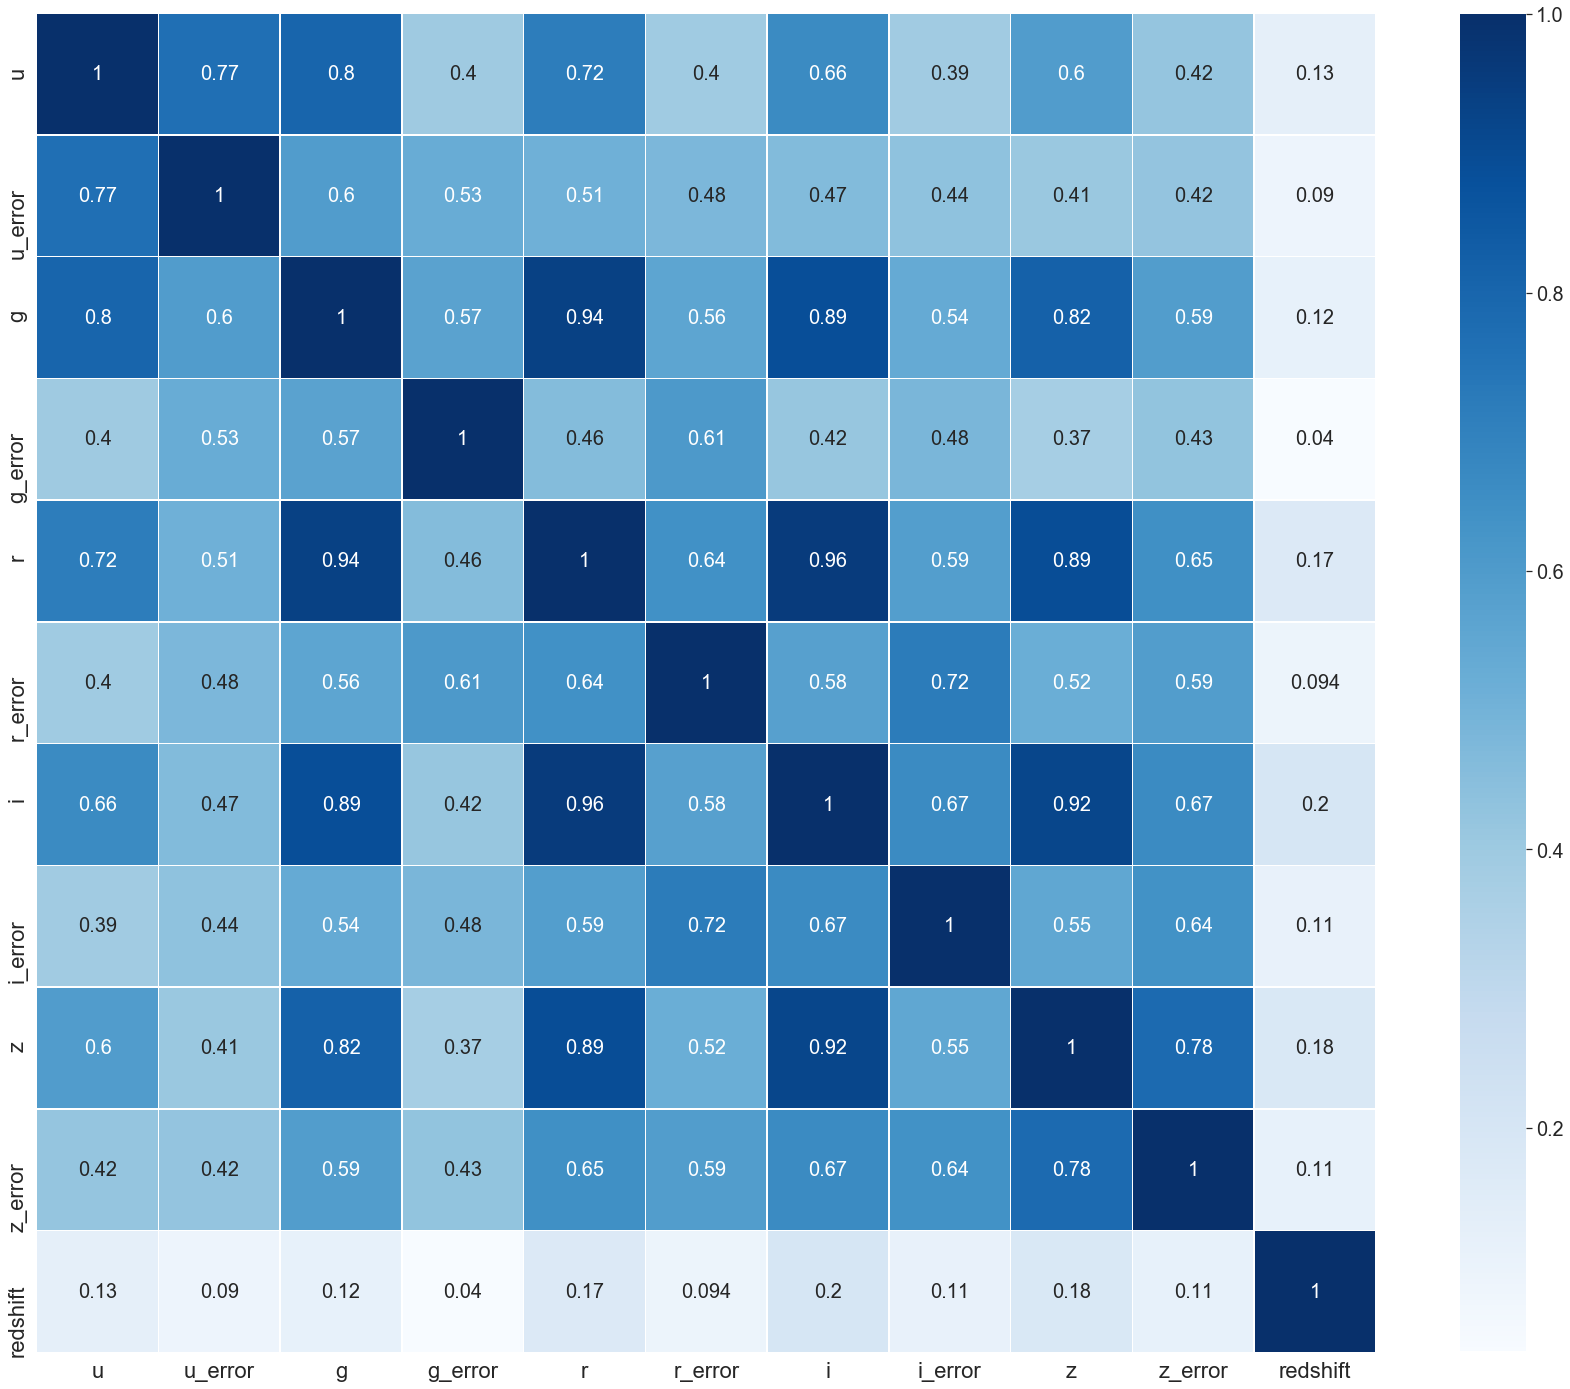

In [20]:
internal_chars = ['u', 'u_error','g','g_error', 'r', 'r_error', 'i', 'i_error','z','z_error','redshift']
corrmat = pre_data[internal_chars].corr()
f, ax = plt.subplots(figsize=(30, 30))
sns.set(font_scale=1.8)
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True,annot_kws={"size": 20},cmap="Blues",cbar_kws={"shrink": 0.82})
plt.savefig('plots/correlation_color2.png')
plt.show()

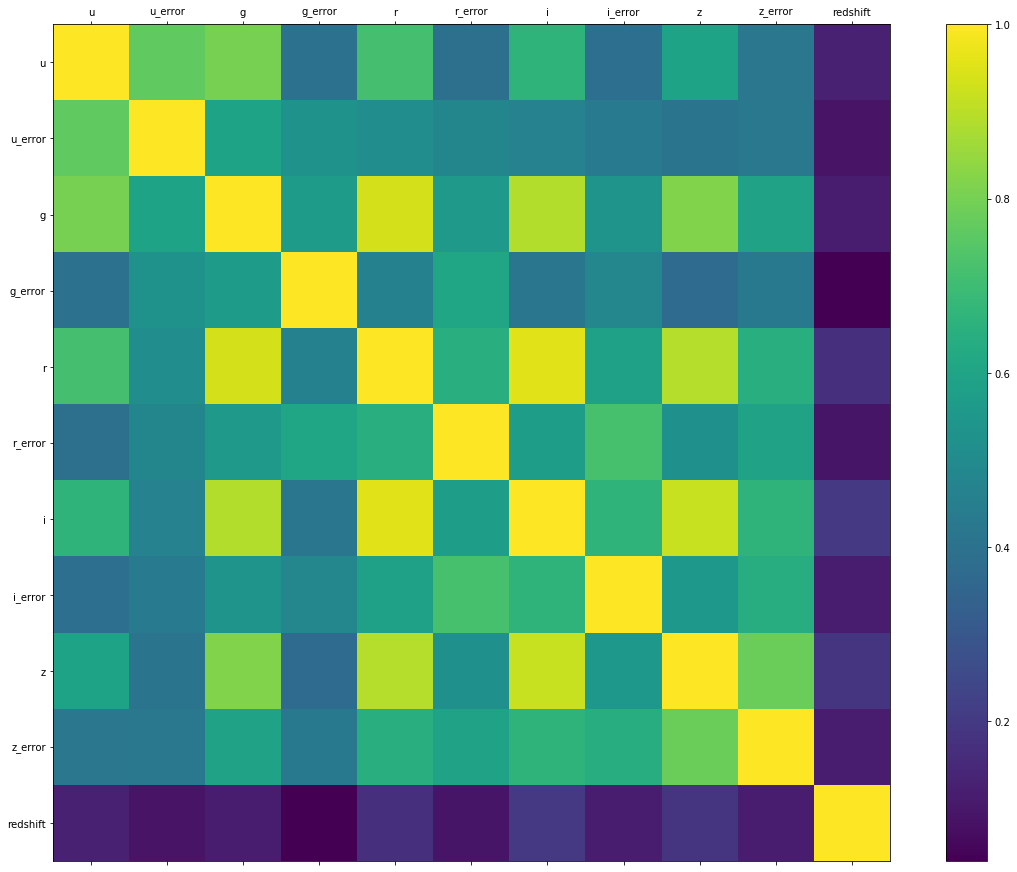

In [9]:

df = data1
f = plt.figure(figsize=(20, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
# plt.title('Correlation Matrix', fontsize=16);
plt.savefig('plots/correlation_color.png')
plt.show()